## Data Analysis and Preprocessing (Task 1)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import logging

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the absolute path to the parent directory
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to sys.path\n
sys.path.append(parent_dir)
from src import handler, visualizer

In [4]:
### Data loading

fraud_df = pd.read_csv("E:/KAIM 2/KAIM 2 Week 8/Week8/data/Fraud_Data.csv")
credit_df = pd.read_csv("E:/KAIM 2/KAIM 2 Week 8/Week8/data/creditcard.csv")
ip_df = pd.read_csv("E:/KAIM 2/KAIM 2 Week 8/Week8/data/IpAddress_to_Country.csv")

In [5]:
# OverView 'fraud data'
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
# OverView 'credit data'
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# OverView 'IP data'
ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [8]:
# create instances
df1 = handler.Handler(fraud_df)
df2 = handler.Handler(credit_df)
df3 = handler.Handler(ip_df)

In [9]:
# data overview fraud data
df1.data_overview()

Number of rows: 151112
Number of columns: 11

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None


In [10]:
# data overview credit data
df2.data_overview()

Number of rows: 284807
Number of columns: 31

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-nu

In [11]:
# data overview ip data
df3.data_overview()

Number of rows: 138846
Number of columns: 3

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


### Data Cleaning
- Handling missing values
- Handling duplicate values
- Handling outliers 
- Handling erroneous datatype

### 1. Handling Missing Values
Handling missing values is important step in data cleaning. Missing values can be represented as NaN (Not a Number) or empty strings. I use the `isnull()` function to identify missing values and the `dropna()` function to remove rows with missing values.

In [12]:
# checking missing values
df1.calculate_missing_percentage()

                Missing Values Percentage Missing
user_id                      0              0.00%
signup_time                  0              0.00%
purchase_time                0              0.00%
purchase_value               0              0.00%
device_id                    0              0.00%
source                       0              0.00%
browser                      0              0.00%
sex                          0              0.00%
age                          0              0.00%
ip_address                   0              0.00%
class                        0              0.00%


As shown from the output there is no missed values in the fraud data

In [13]:
# checking missing values in the credit data
df2.calculate_missing_percentage()

        Missing Values Percentage Missing
Time                 0              0.00%
V1                   0              0.00%
V2                   0              0.00%
V3                   0              0.00%
V4                   0              0.00%
V5                   0              0.00%
V6                   0              0.00%
V7                   0              0.00%
V8                   0              0.00%
V9                   0              0.00%
V10                  0              0.00%
V11                  0              0.00%
V12                  0              0.00%
V13                  0              0.00%
V14                  0              0.00%
V15                  0              0.00%
V16                  0              0.00%
V17                  0              0.00%
V18                  0              0.00%
V19                  0              0.00%
V20                  0              0.00%
V21                  0              0.00%
V22                  0            

As shown from the output there is no missed values in the credit data

In [14]:
# checking missing values in the IP data 
df3.calculate_missing_percentage()

                        Missing Values Percentage Missing
lower_bound_ip_address               0              0.00%
upper_bound_ip_address               0              0.00%
country                              0              0.00%


As shown from the output there is no missed values in the IP data

                        If so let us jump another cleaning technique

### 2. Handling Duplicate Values
Handling duplicate values involves identifying and removing duplicate rows from the DataFrame. I use the `duplicated()` function to identify duplicate rows and the `drop_duplicates()` function to remove them.

In [15]:
# checking duplicate values in the fraud data
df1.check_duplicate()


Duplicated values:
0 duplicated rows


there are no duplicated rows/ values

In [16]:
# checking duplicate values in the credit data
df2.check_duplicate()


Duplicated values:
1081 duplicated rows


There are `1081` duplicated values in the credit card data.

In [17]:
# checking duplicate values in the IP data
df3.check_duplicate()


Duplicated values:
0 duplicated rows


no duplicated data in the IP data.

As there are duplicates in the credit data, let us do cleaning

In [18]:
# drop duplicated values in the credit data
credit_df.drop_duplicates(inplace=True)

In [19]:
# now, after cleaning, let us check if any duplicate
df2.check_duplicate()


Duplicated values:
0 duplicated rows


yeah, there is no duplication of rows

### 3. Handling outliers
Handling outliers is a crucial step in data cleaning and preprocessing. Here are the key steps to handle outliers effectively:
#### Identifying Outliers
The first step is to identify the presence of outliers in my dataset. I Use box plots.

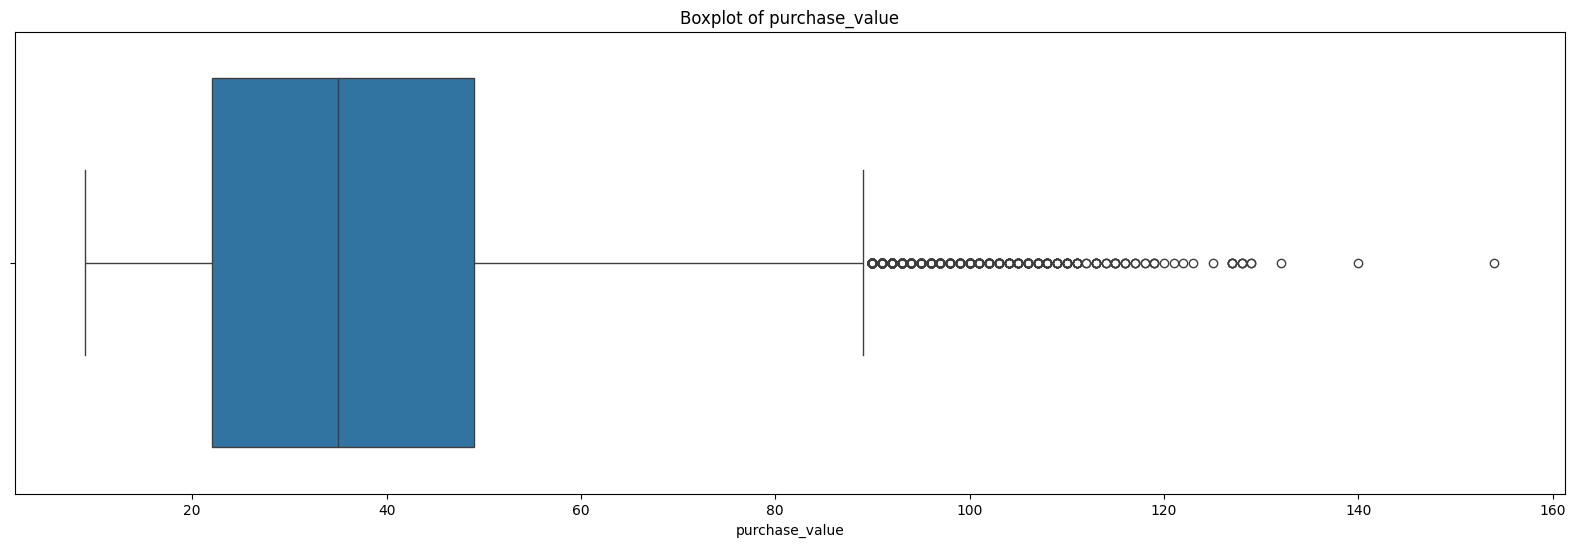

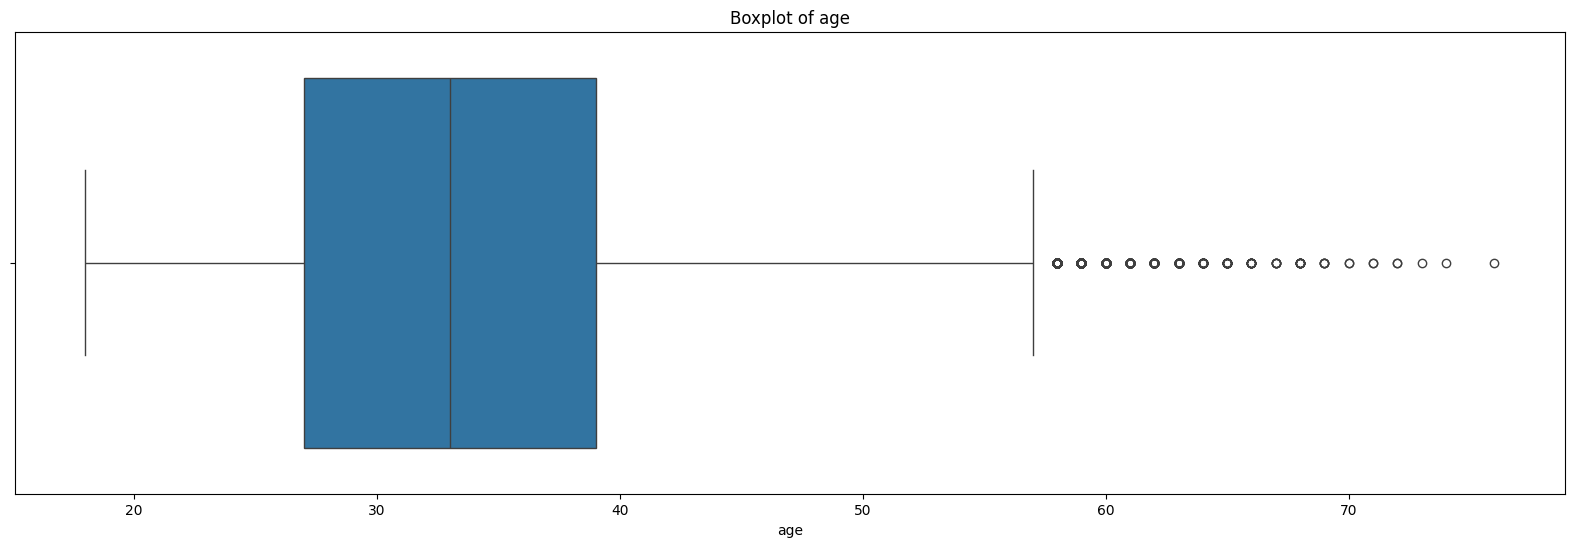

In [20]:
cols = ['purchase_value', "age"]
for col in cols:
    visualizer.plot_boxplot(fraud_df, col)

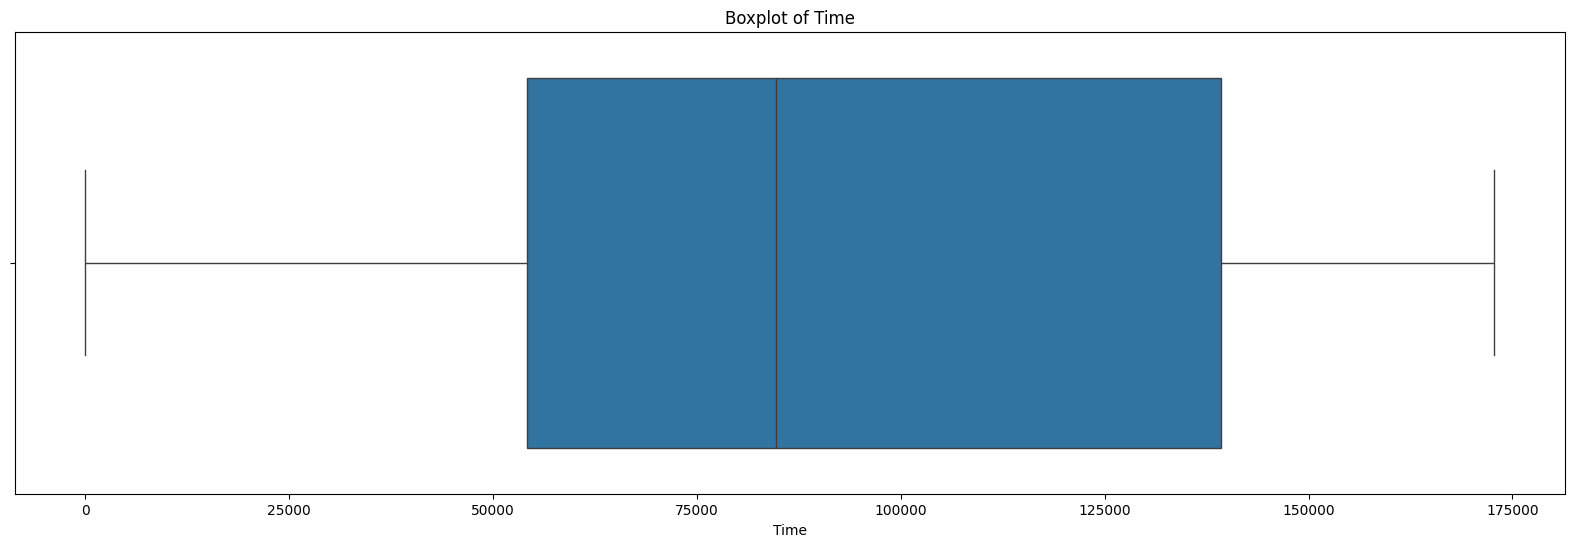

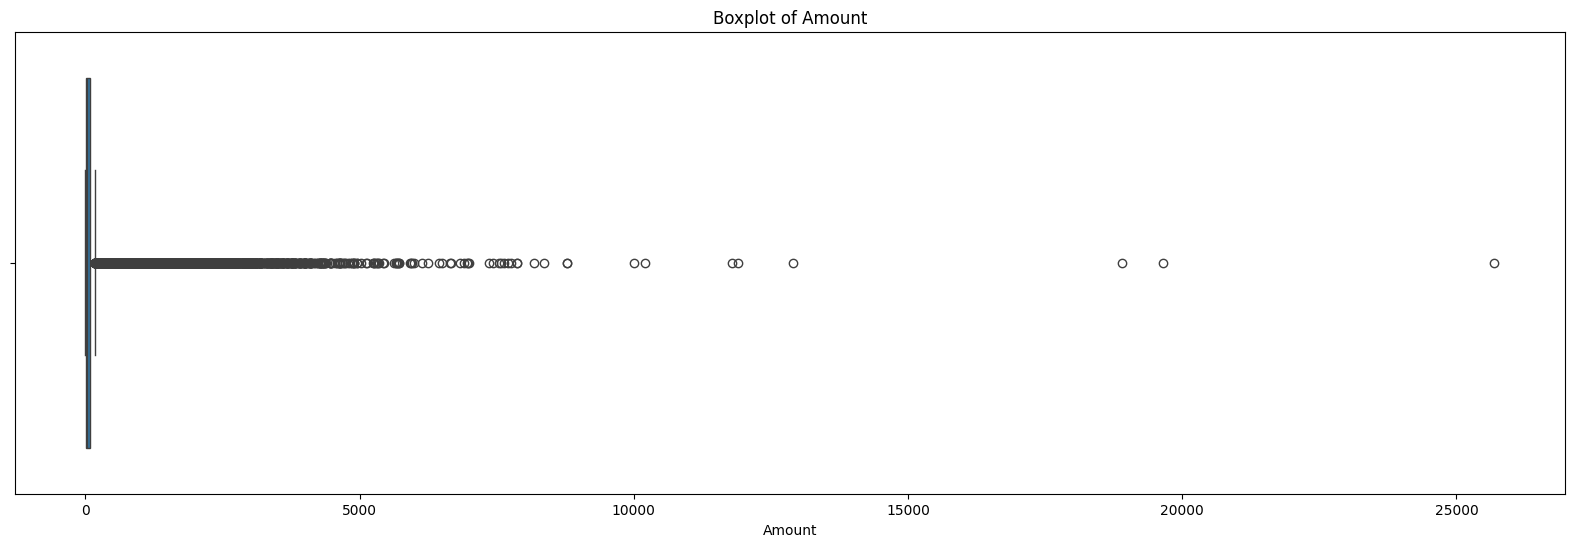

In [21]:
# checking outlires in the credit card data
credit_cols = ["Time", "Amount"]
for col in credit_cols:
    visualizer.plot_boxplot(credit_df, col)

As shown from the above plots, there are values which far apart form the distribution....ie.e., outliers

In [22]:
### hence, let us remove these outliers
for col in cols:
    df1.remove_iqr_outliers(col)

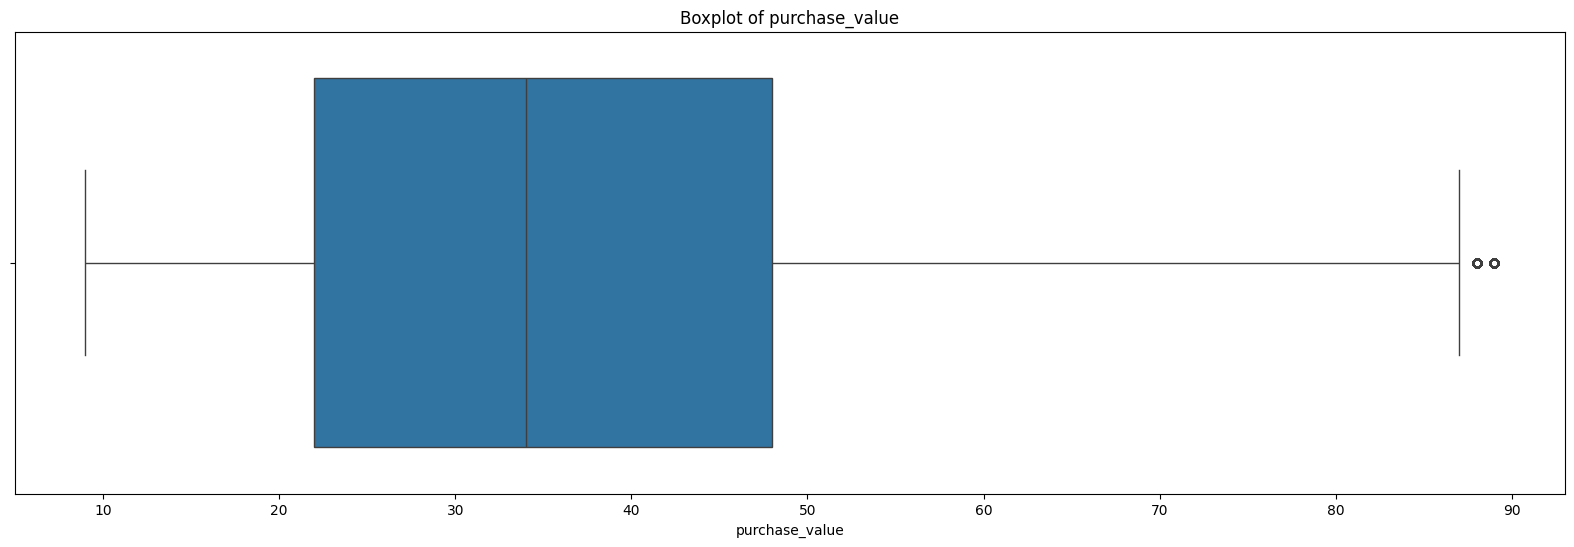

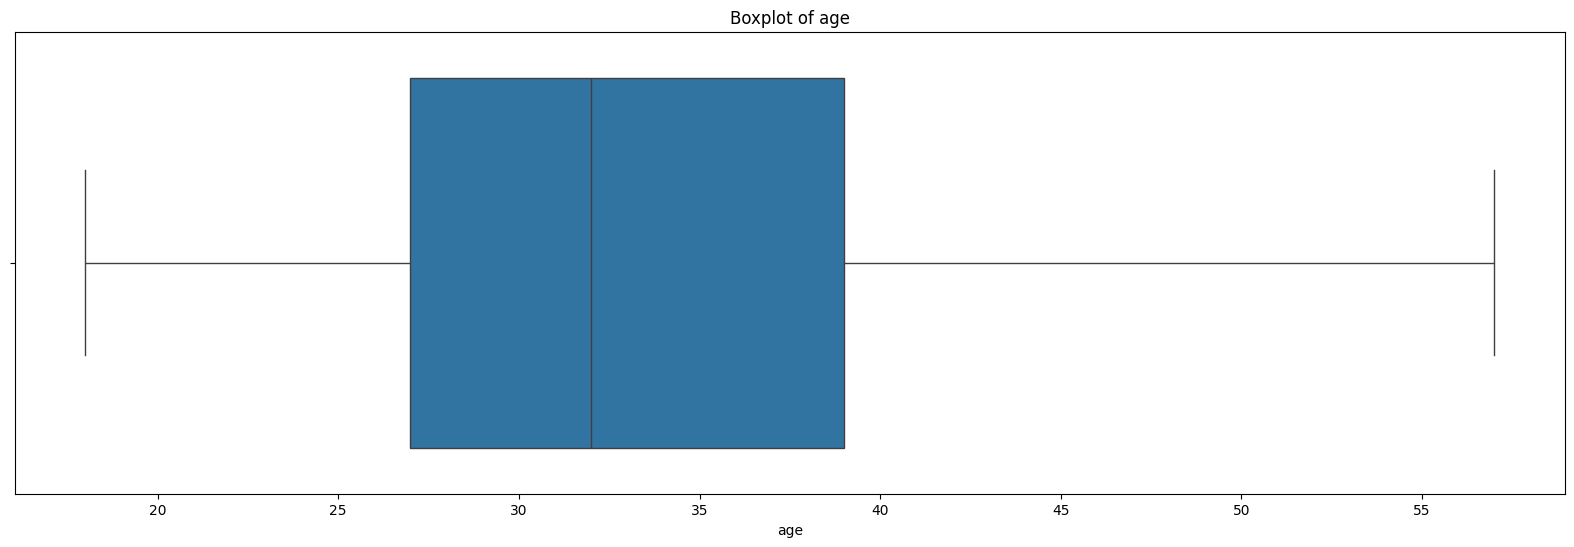

In [24]:
# now, after cleaning the outliers let us see also if else outlier using boxplot
for col in cols:
    visualizer.plot_boxplot(fraud_df, col)

yeah, no outliers here after removing

In [25]:
# Removing outliers from credit card data
df2.remove_iqr_outliers("Amount")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,NaN,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


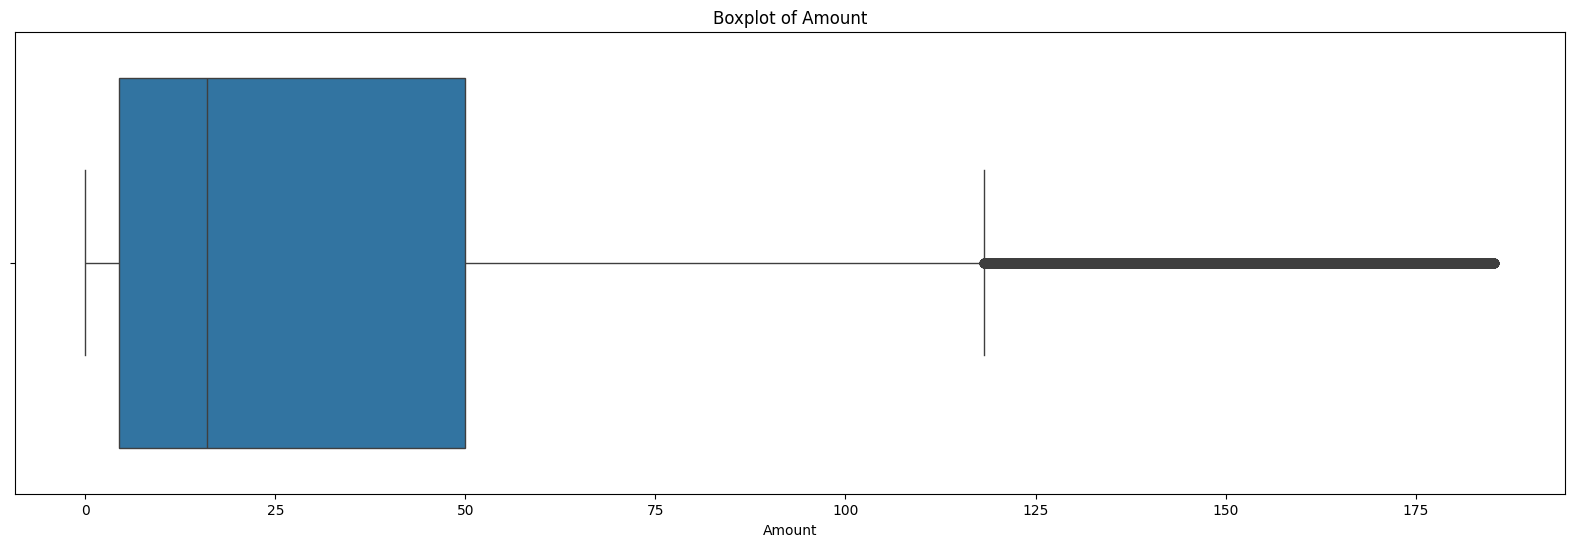

In [26]:
visualizer.plot_boxplot(credit_df, "Amount")

### 4. Handling erroneous data type

In [27]:
# Correct data types
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

In [28]:
# check the data types of each column in the fraud data
fraud_df.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value           float64
device_id                 object
source                    object
browser                   object
sex                       object
age                      float64
ip_address               float64
class                      int64
dtype: object

### 5) Feature Engineering

In [29]:
def feature_eng():
    # Transaction frequency and velocity
    fraud_df['transaction_count'] = fraud_df.groupby('user_id')['user_id'].transform('count')
    fraud_df['transaction_velocity'] = fraud_df['transaction_count'] / (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()


In [30]:
feature_eng()
df1.create_date_features('purchase_time')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,transaction_count,transaction_velocity,hour_of_day,day,day_of_week,month,year
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39.0,7.327584e+08,0,1,2.218927e-07,2,18,Saturday,April,2015
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53.0,3.503114e+08,0,1,5.572893e-05,1,8,Monday,June,2015
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53.0,2.621474e+09,1,1,1.000000e+00,18,1,Thursday,January,2015
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41.0,3.840542e+09,0,1,2.032169e-06,13,4,Monday,May,2015
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45.0,4.155831e+08,0,1,2.292810e-07,18,9,Wednesday,September,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43.0,XPSKTWGPWINLR,SEO,Chrome,M,28.0,3.451155e+09,1,1,1.900695e-07,0,29,Sunday,March,2015
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35.0,LYSFABUCPCGBA,SEO,Safari,M,32.0,2.439047e+09,0,1,1.073802e-06,12,26,Tuesday,May,2015
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40.0,MEQHCSJUBRBFE,SEO,IE,F,26.0,2.748471e+09,0,1,1.496644e-07,7,20,Wednesday,May,2015
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46.0,CMCXFGRHYSTVJ,SEO,Chrome,M,37.0,3.601175e+09,0,1,1.943212e-07,9,7,Monday,September,2015


In [31]:
df1.drop_missing_values()
df1.calculate_missing_percentage()

                      Missing Values Percentage Missing
user_id                            0              0.00%
signup_time                        0              0.00%
purchase_time                      0              0.00%
purchase_value                     0              0.00%
device_id                          0              0.00%
source                             0              0.00%
browser                            0              0.00%
sex                                0              0.00%
age                                0              0.00%
ip_address                         0              0.00%
class                              0              0.00%
transaction_count                  0              0.00%
transaction_velocity               0              0.00%
hour_of_day                        0              0.00%
day                                0              0.00%
day_of_week                        0              0.00%
month                              0            

###  Statistical description

In [33]:
# fraud dataset
num_cols, cat_cols = fraud_df.select_dtypes(exclude=['object']), fraud_df.select_dtypes(include=["object"])

In [34]:
num_cols.describe()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class,transaction_count,transaction_velocity,hour_of_day,day,year
count,149277.000000,149277,149277,149277.000000,149277.000000,1.492770e+05,149277.000000,149277.0,1.492770e+05,149277.000000,149277.000000,149277.0
mean,200170.498161,2015-04-20 00:55:45.170983936,2015-06-16 02:54:16.488086016,36.501651,33.001005,2.152525e+09,0.093605,1.0,5.022976e-02,11.520897,15.280505,2015.0
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,18.000000,5.209350e+04,0.000000,1.0,9.645088e-08,0.000000,1.000000,2015.0
25%,100623.000000,2015-02-18 09:38:17,2015-04-18 14:24:55,22.000000,27.000000,1.086213e+09,0.000000,1.0,1.307958e-07,6.000000,8.000000,2015.0
50%,200001.000000,2015-04-19 04:07:25,2015-06-18 13:36:42,34.000000,32.000000,2.155693e+09,0.000000,1.0,2.029967e-07,12.000000,15.000000,2015.0
75%,300038.000000,2015-06-18 15:44:13,2015-08-17 18:40:09,48.000000,39.000000,3.243797e+09,0.000000,1.0,4.573210e-07,17.000000,23.000000,2015.0
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,89.000000,57.000000,4.294850e+09,1.000000,1.0,1.000000e+00,23.000000,31.000000,2015.0
std,115368.377754,NaN,NaN,17.645555,8.409680,1.248660e+09,0.291279,0.0,2.184172e-01,6.912415,8.815217,0.0


In [35]:
cat_cols.describe()

,device_id,source,browser,sex,day_of_week,month
count,149277,149277,149277,149277,149277,149277
unique,136351,3,5,2,7,12
top,KIPFSCNUGOLDP,SEO,Chrome,M,Sunday,July
freq,20,59867,60724,87239,21738,19287


### saving the Data

In [37]:
fraud_df.to_csv("../data/processed/preprocessed_fraud_data.csv", index=False)
credit_df.to_csv("../data/processed/preprocessed_credit_data.csv", index=False)

### Data Visualization
Data visualization is a crucial aspect of data analysis, as it helps to effectively communicate insights and patterns in the data. Here's a brief overview of how data visualization can be applied in univariate, bivariate, and multivariate analysis.

#### 1) Univariate analysis
In univariate analysis, where only one variable is considered at a time. These visualizations help to understand the central tendency, spread, and shape of the distribution of a single variable.

#### Distribution of Numerical Features

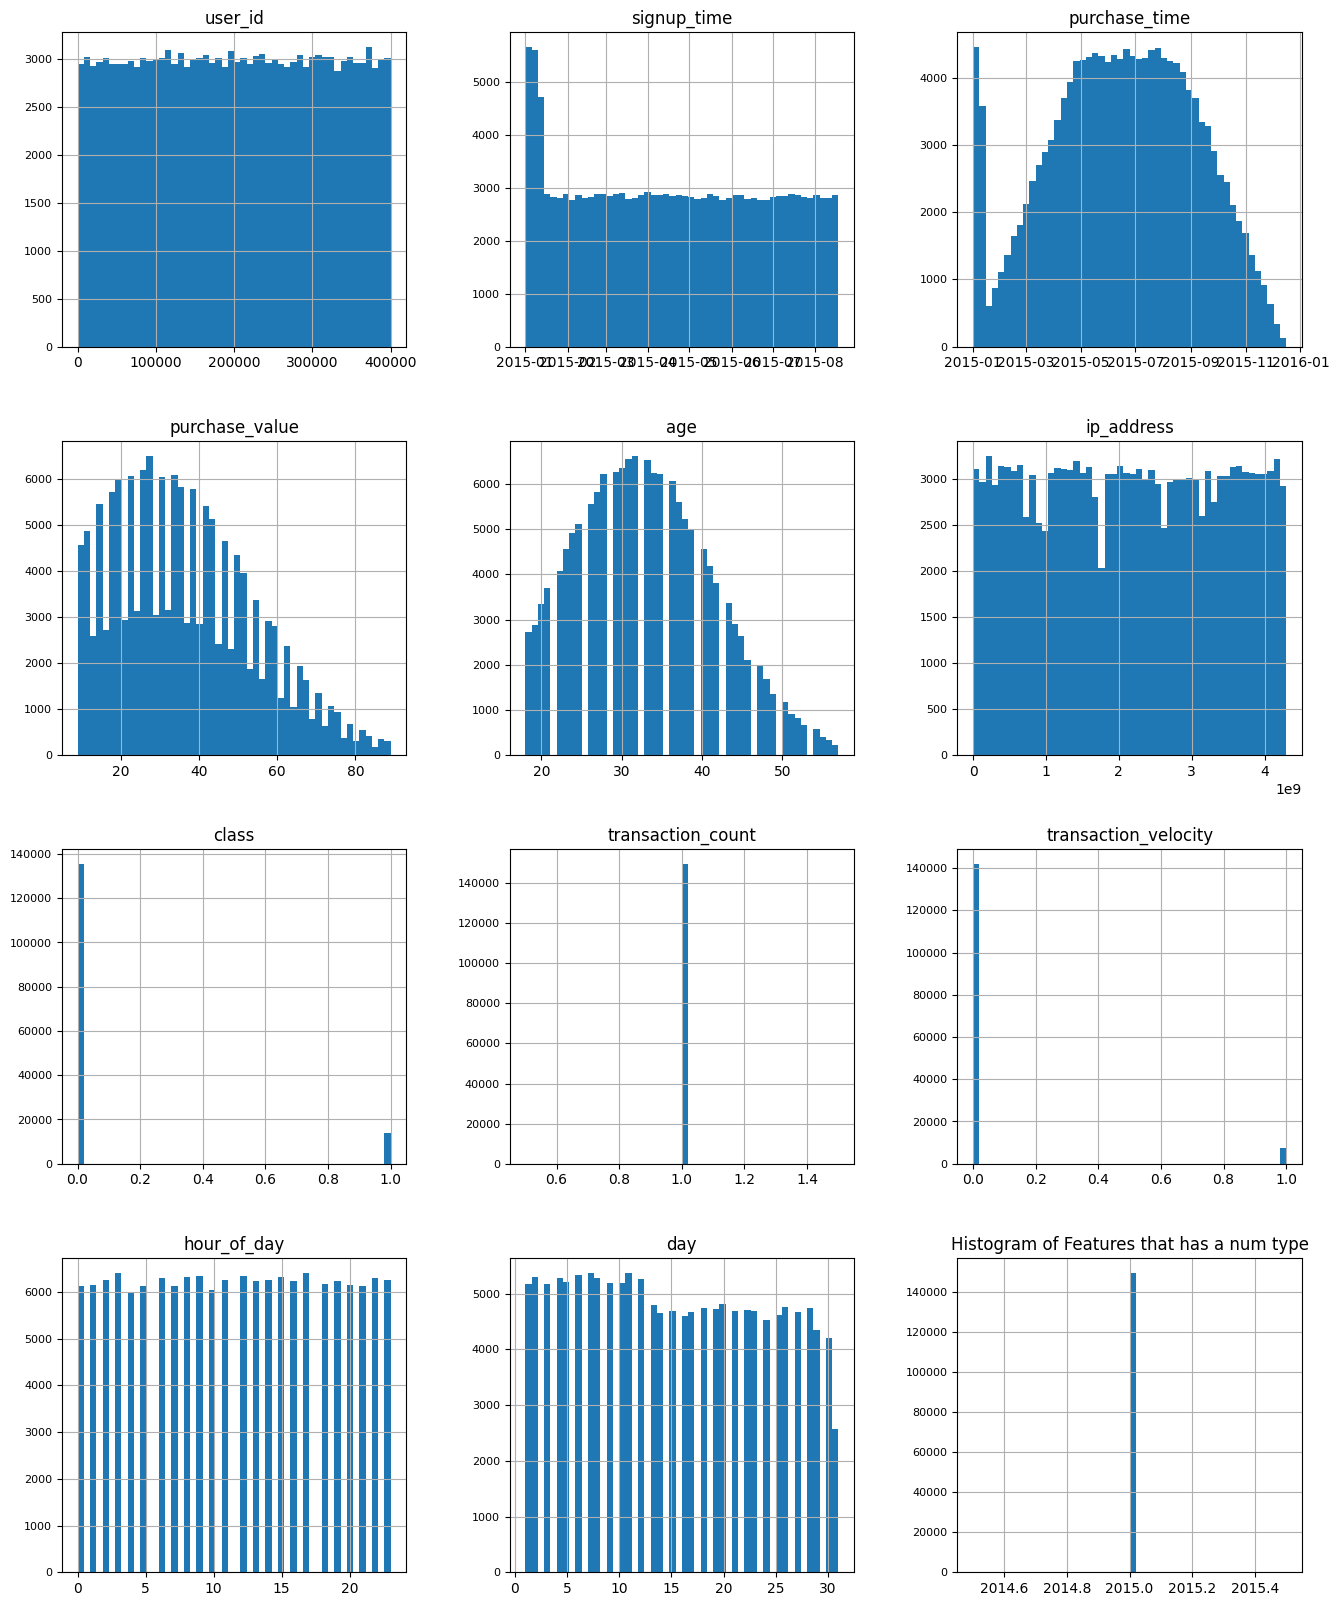

In [36]:
num_cols.hist(figsize=(16, 20), bins=50, ylabelsize=8)
plt.title("Histogram of Features that has a num type")
plt.show()

#### Distribution of Categorical Features

In [ ]:
cat_col = ['source', 'browser', 'sex', 'day_of_week', 'month']
for col in cat_cols:
    visualizer.plot_count(fraud_df, col, hue_col='class')

#### 2) Bivariate and Multivariate analysis

Multivariate analysis involves the study of three or more variables simultaneously. Visualizations for multivariate data can be more complex.

Bivariate analysis examines the relationship between two variables.

In [27]:
num_cols.columns


Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'age',
       'ip_address', 'class', 'transaction_count', 'transaction_velocity',
       'hour_of_day', 'day', 'year'],
      dtype='object')

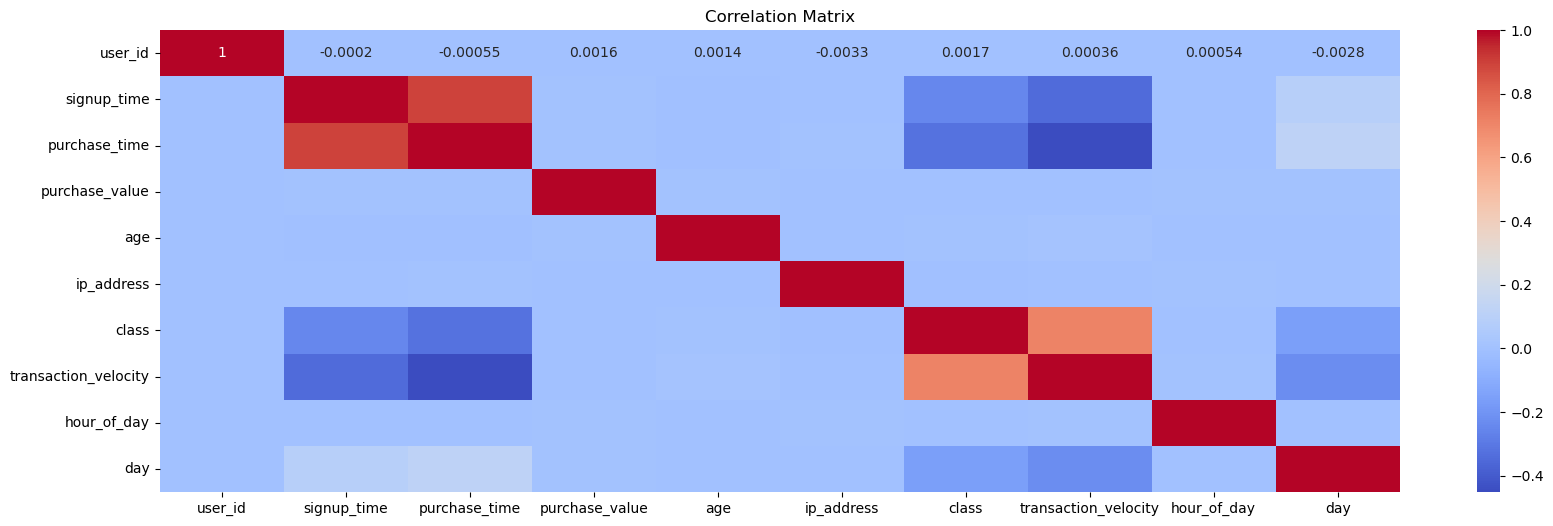

In [29]:
num_cols = ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'age',
       'ip_address', 'class', 'transaction_velocity', 'hour_of_day', 'day']
visualizer.correlation_matrix(fraud_df[num_cols])

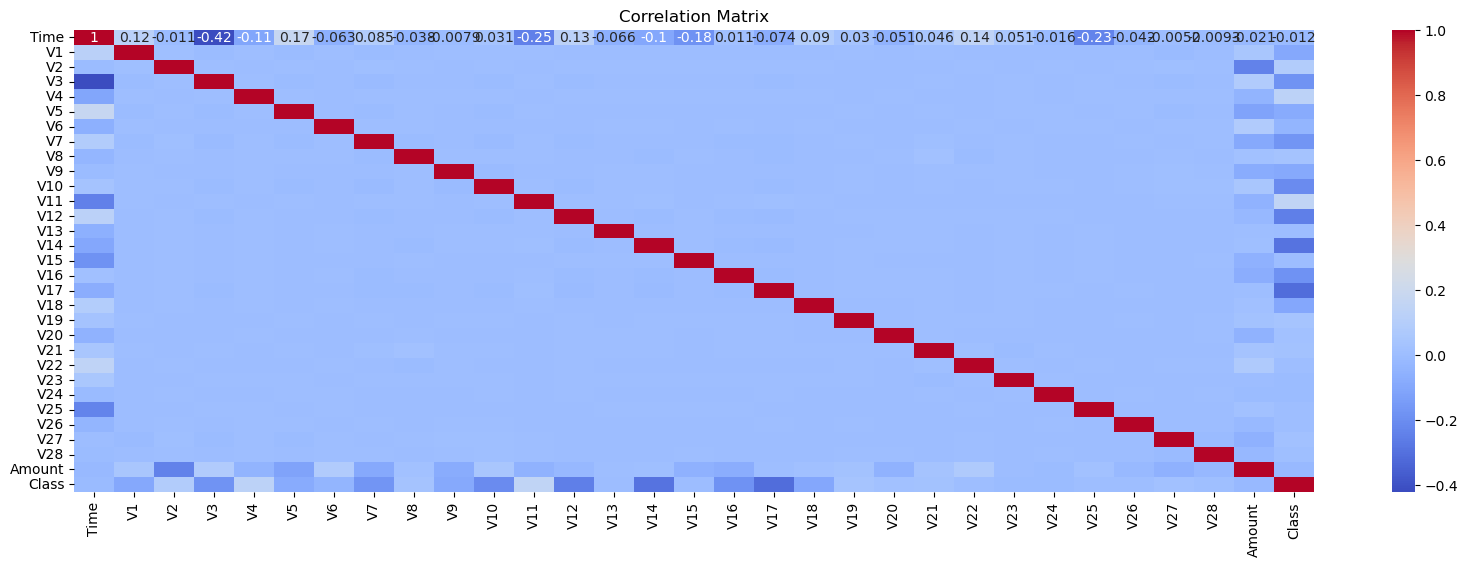

In [30]:
visualizer.correlation_matrix(credit_df)

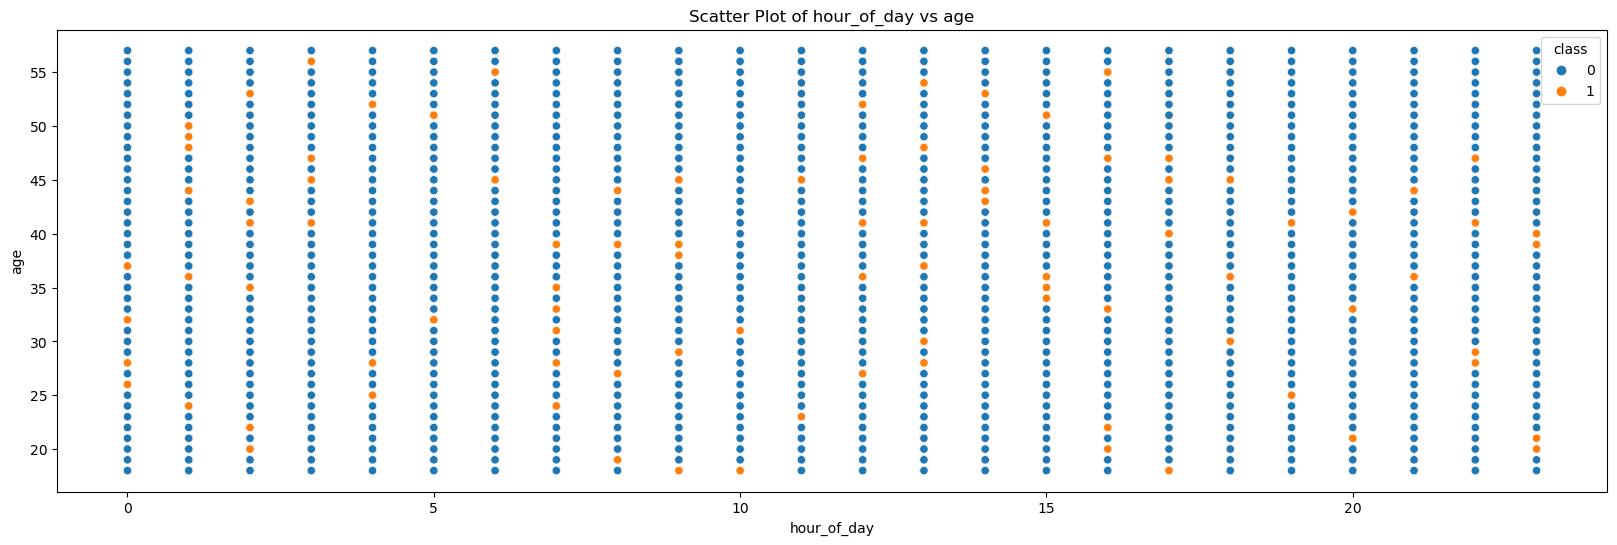

In [32]:
visualizer.plot_scatter(fraud_df, x_col='', y_col='age', hue_col='class')

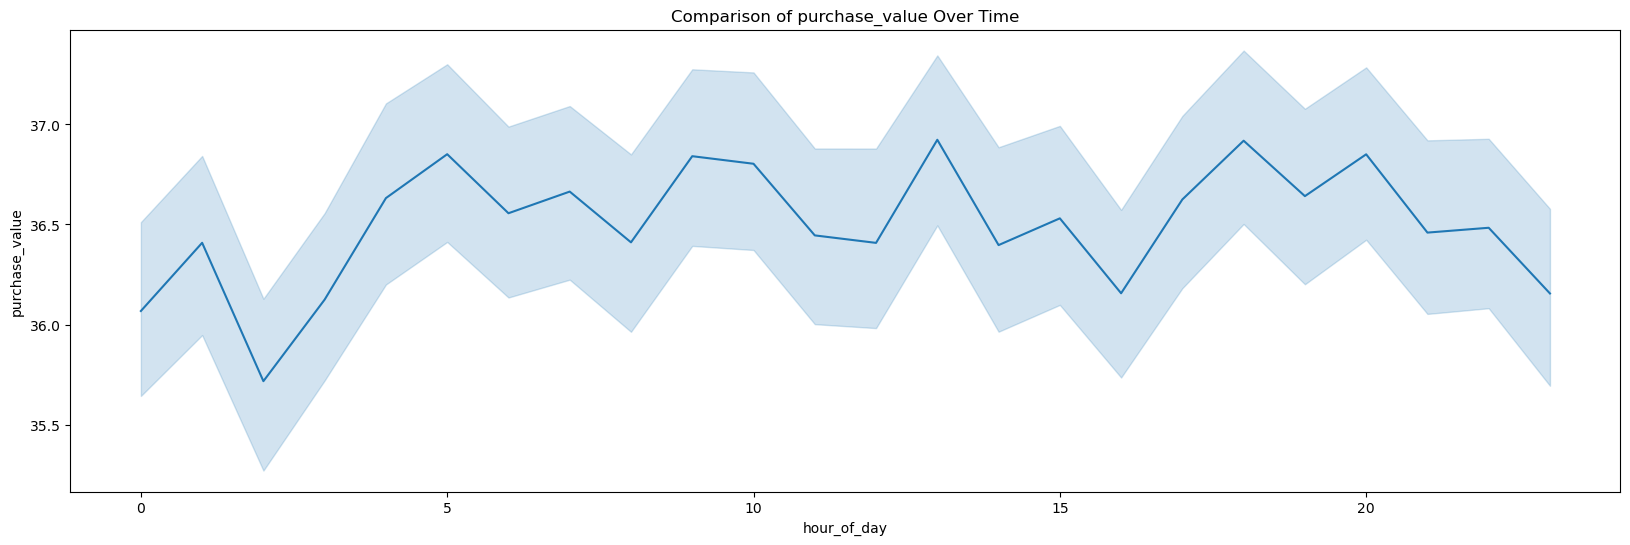

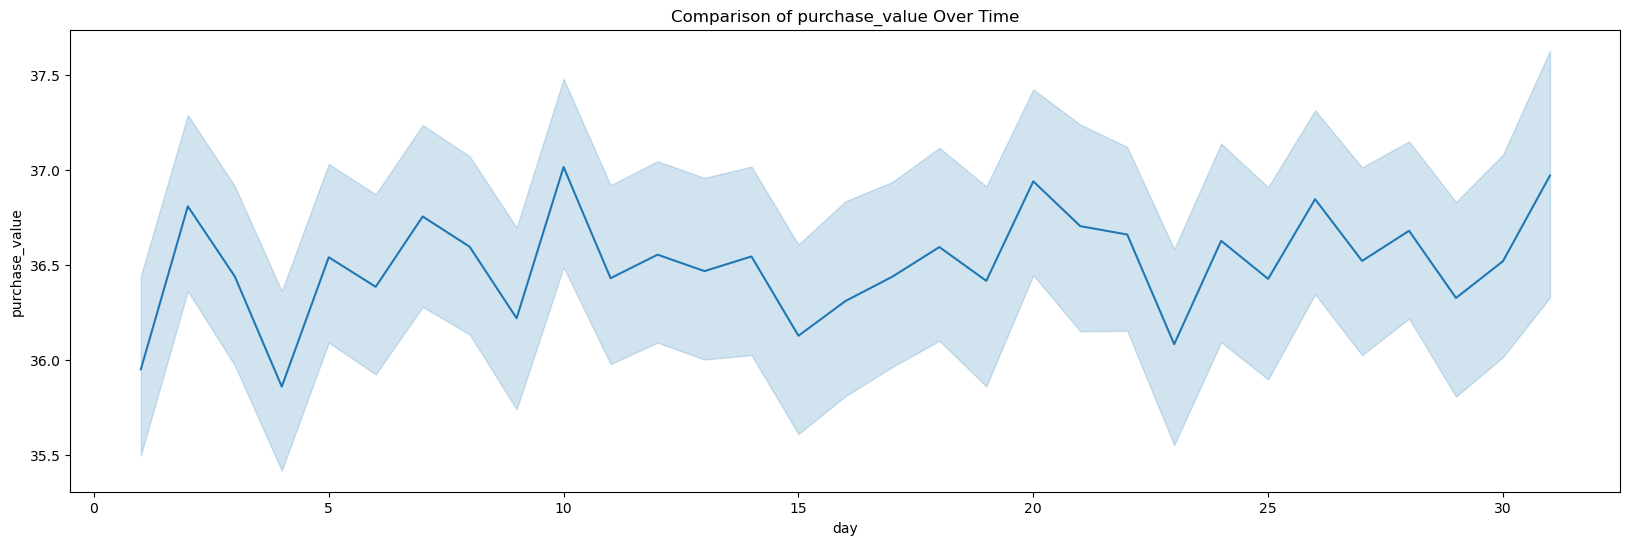

[06/26/24 23:22:27] INFO     Using categorical units to plot a list of strings that are all         ]8;id=462164;file:///home/derbew/anaconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=55067;file:///home/derbew/anaconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/category.py#223\223]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

                    INFO     Using categorical units to plot a list of strings that are all         ]8;id=924908;file:///home/derbew/anaconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=304933;file:///home/derbew/anaconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/category.py#223\223]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

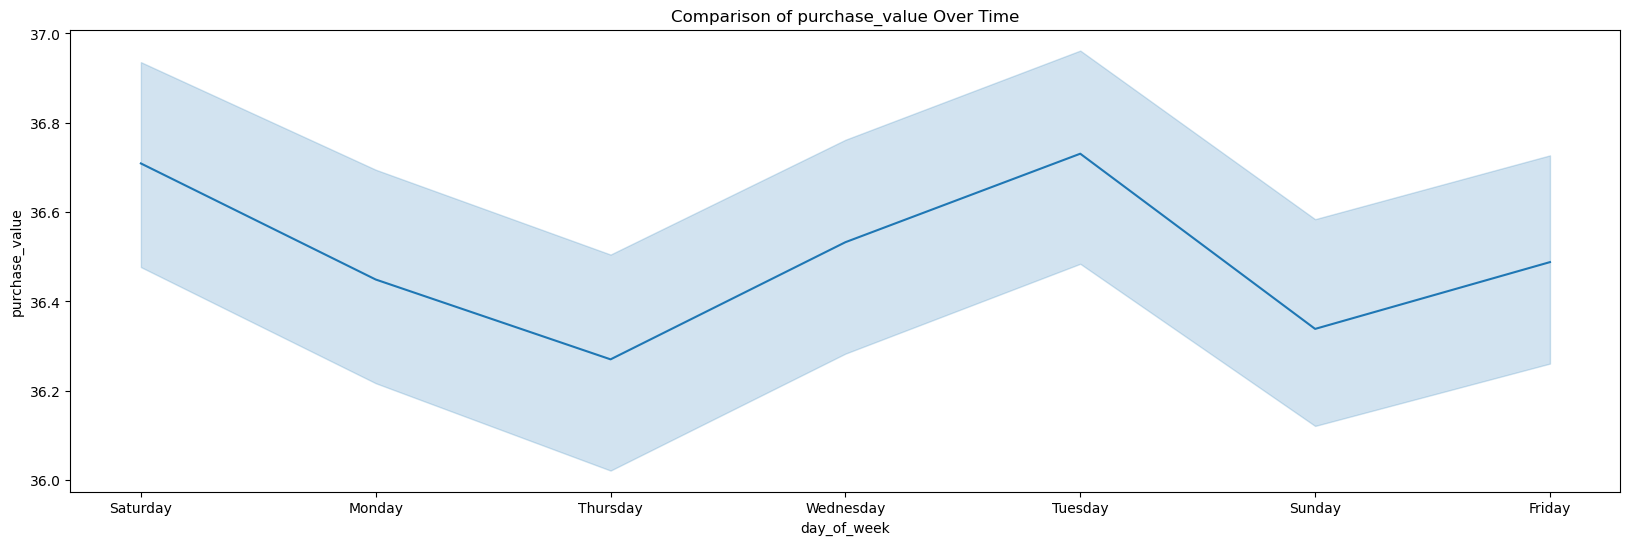

[06/26/24 23:22:29] INFO     Using categorical units to plot a list of strings that are all         ]8;id=124983;file:///home/derbew/anaconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=510534;file:///home/derbew/anaconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/category.py#223\223]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

                    INFO     Using categorical units to plot a list of strings that are all         ]8;id=803722;file:///home/derbew/anaconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/category.py\category.py]8;;\:]8;id=689317;file:///home/derbew/anaconda3/envs/myenv/lib/python3.12/site-packages/matplotlib/category.py#223\223]8;;\
                             parsable as floats or dates. If these strings should be plotted as                    
                             numbers, cast to the appropriate data type before plotting.                           

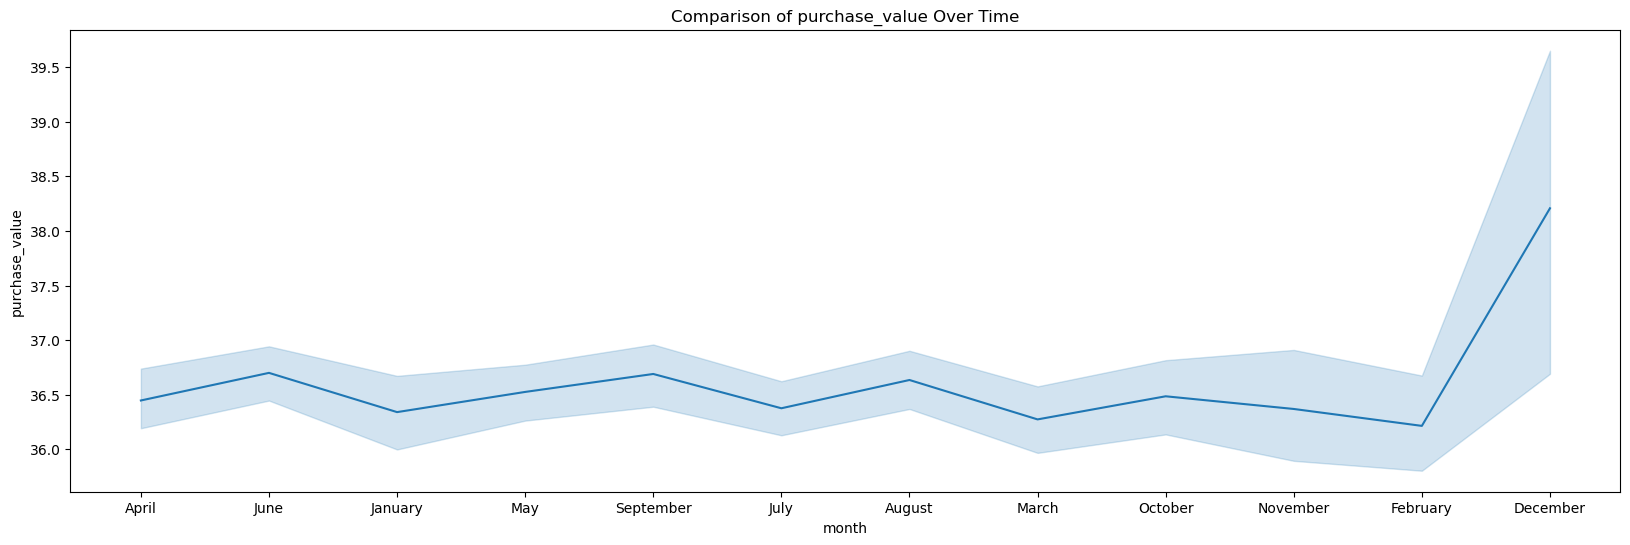

In [36]:
# line plot of views over different time
cols = ['hour_of_day', "day", "day_of_week", "month"]
for col in cols:
    visualizer.plot_line(fraud_df, col, 'purchase_value')


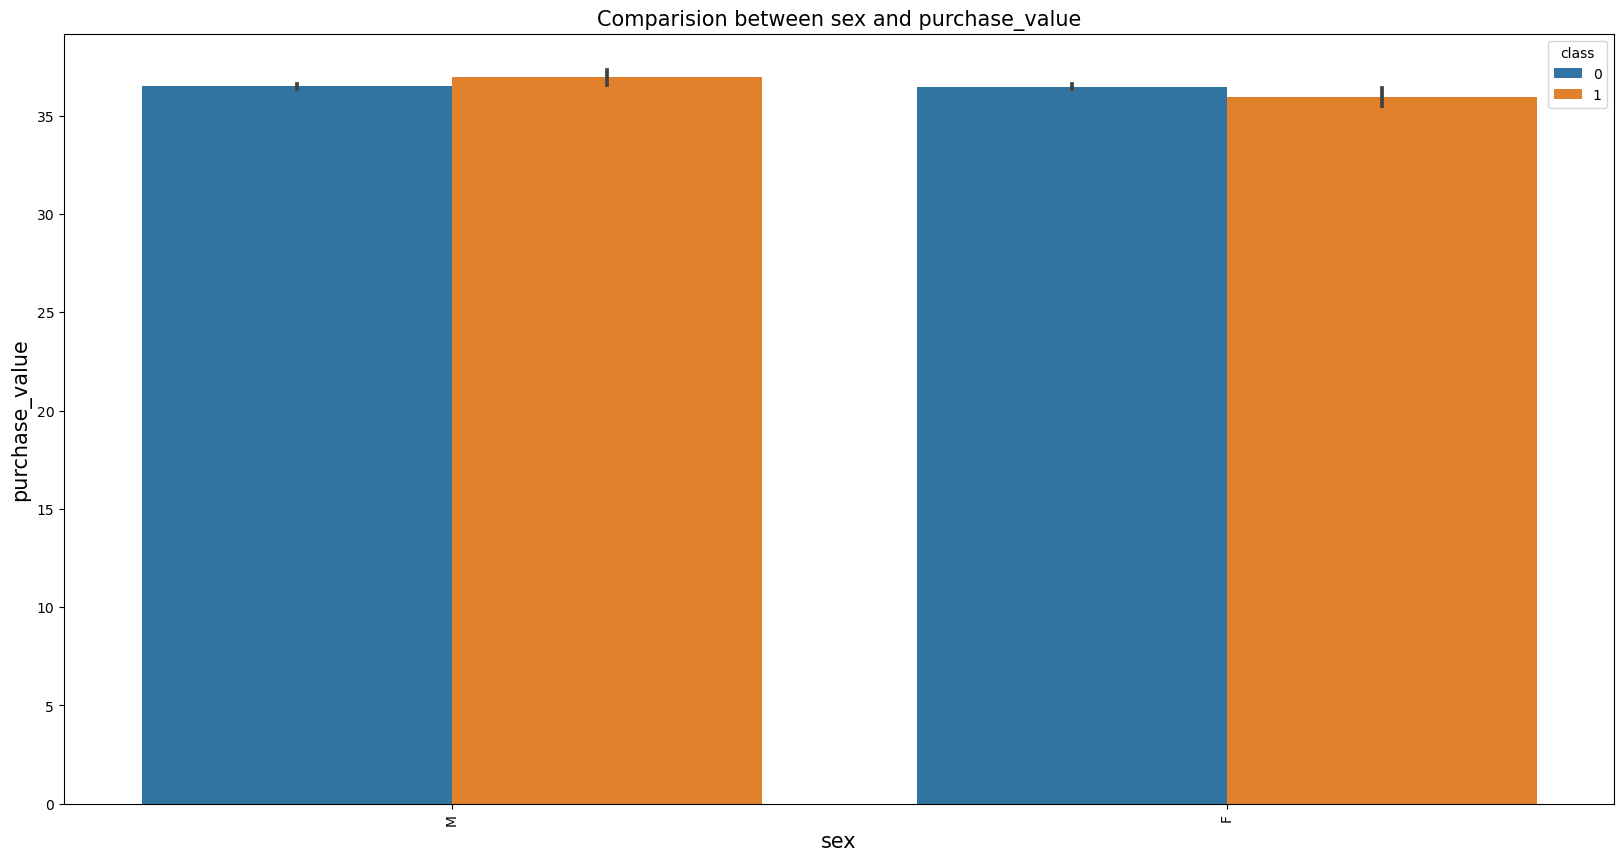

In [37]:
visualizer.plot_bar(fraud_df, 'sex', 'purchase_value', 'class')

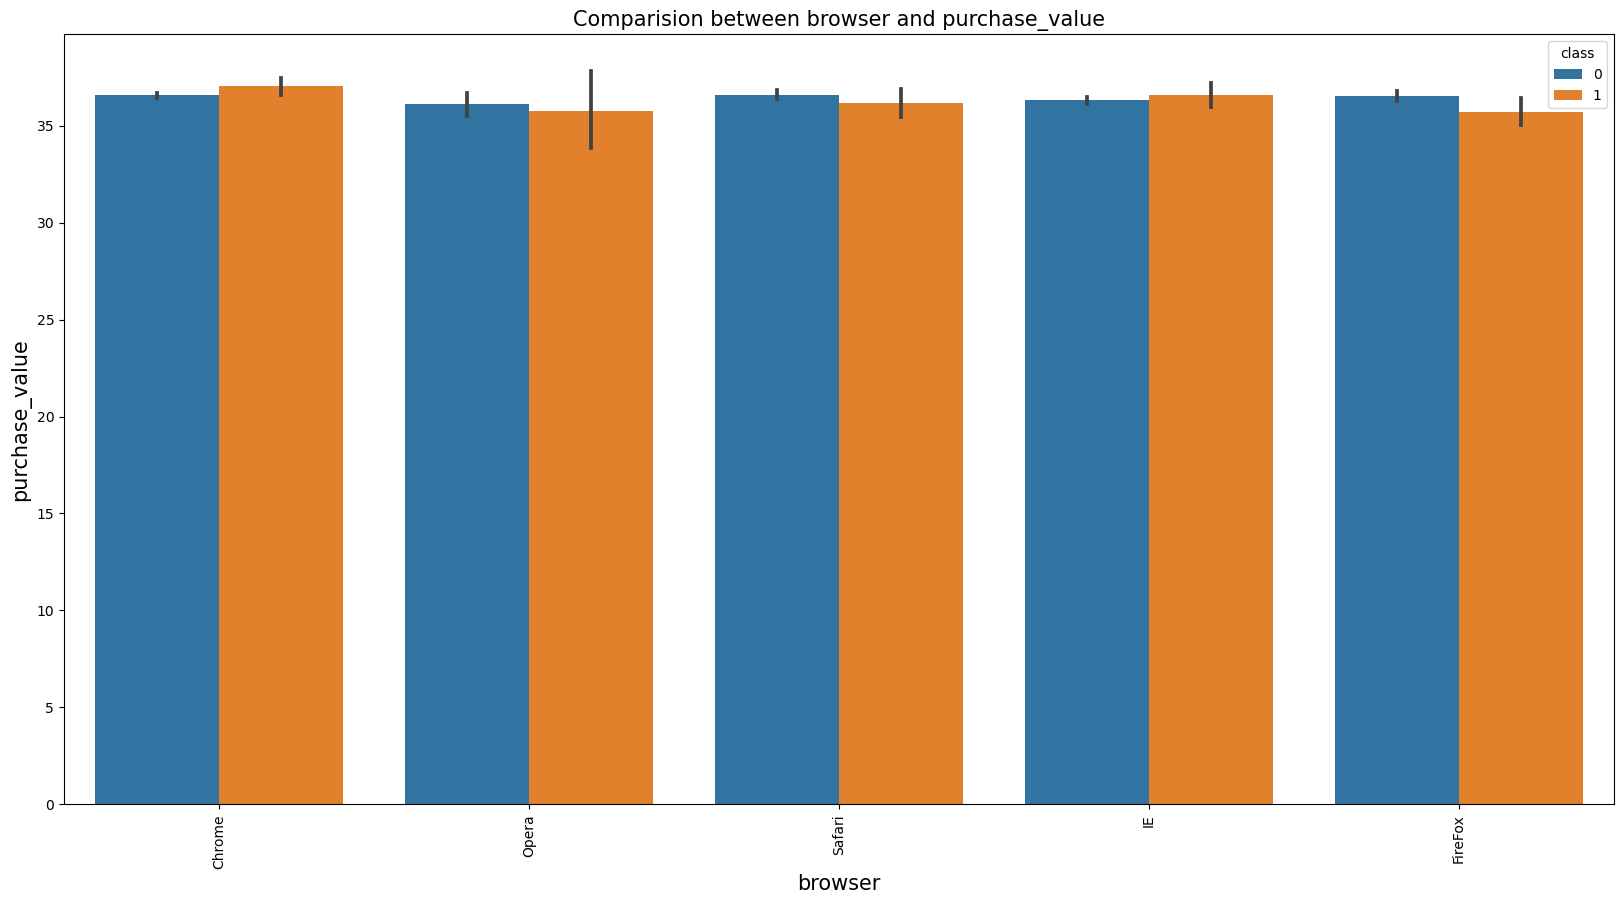

In [38]:
visualizer.plot_bar(fraud_df, 'browser', 'purchase_value', 'class')

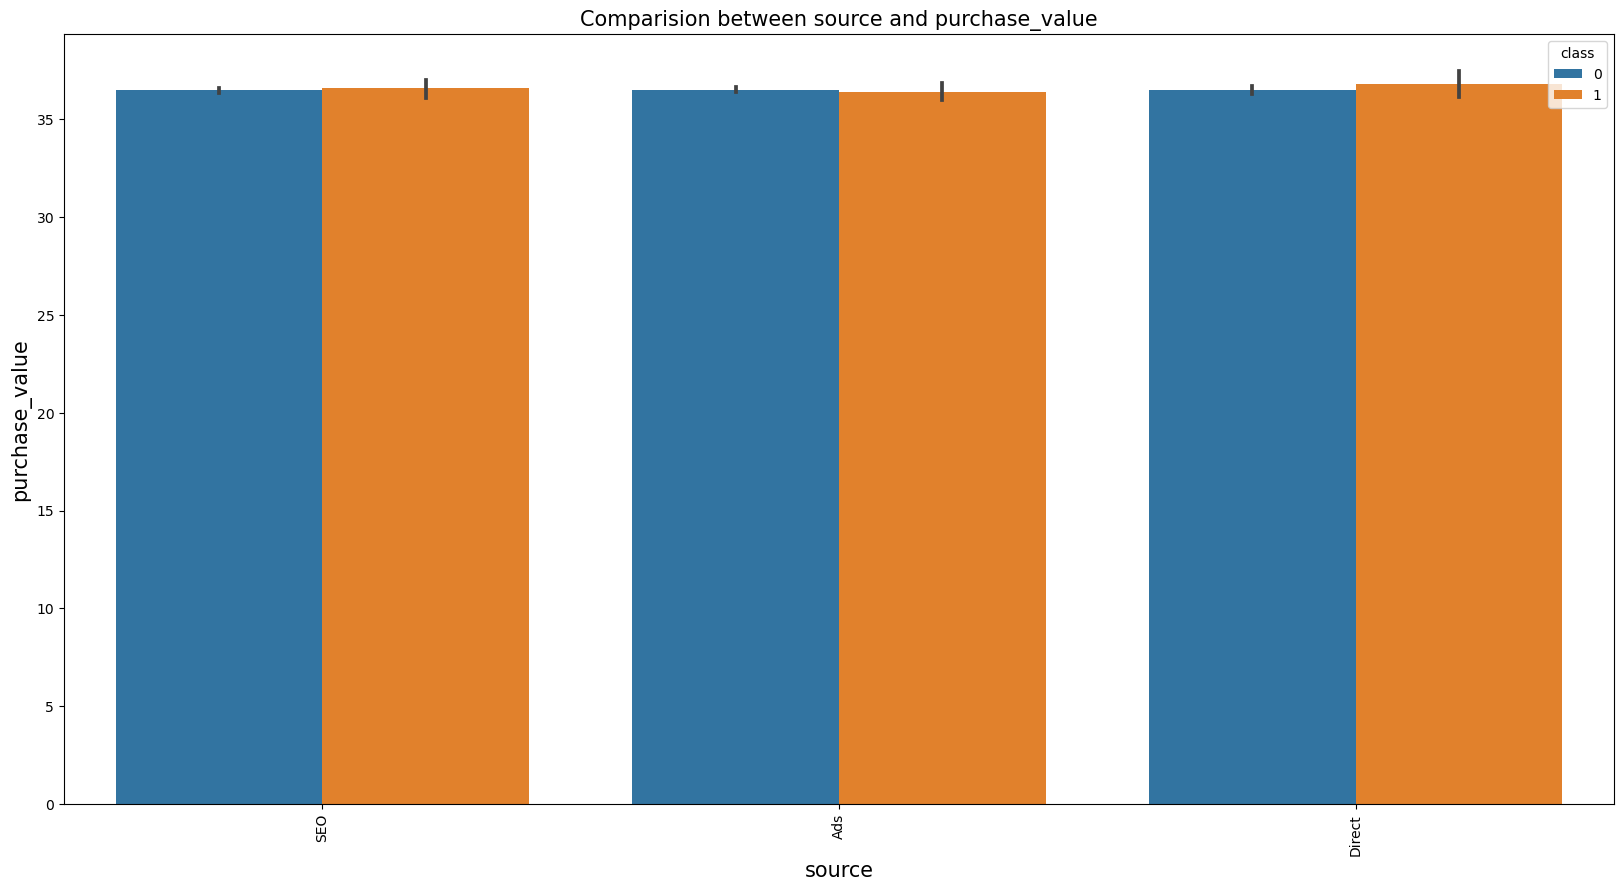

In [39]:
visualizer.plot_bar(fraud_df, 'source', 'purchase_value', 'class')